In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [29]:
sentences = [
    'My favorite food is ice cream',
    'do you like ice cream too?',
    'My dog likes ice cream!',
    "your favorite flavor of icecream is chocolate",
    "chocolate isn't good for dogs",
    "your dog, your cat, and your parrot prefer broccoli"
]

In [30]:
# Optionally set the max number of words to tokenize.
# The out of vocabulary (OOV) token represents words that are not in the index.
# Call fit_on_text() on the tokenizer to generate unique numbers for each word
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

In [31]:
# Examine the word index
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}


In [32]:
# Get the number for a given word
print(word_index['favorite'])

6


In [33]:
sequences = tokenizer.texts_to_sequences(sentences)
print (sequences)

[[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]


In [34]:
padded = pad_sequences(sequences)
print('\nWord Index = ', word_index)
print('\nSequences = ', sequences)
print('\nPadded Sequences:')
print(padded)


Word Index =  {'<OOV>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}

Sequences =  [[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]

Padded Sequences:
[[ 0  0  0  5  6 10  7  3  4]
 [ 0  0  0 11 12 13  3  4 14]
 [ 0  0  0  0  5  8 15  3  4]
 [ 0  0  2  6 16 17 18  7  9]
 [ 0  0  0  0  9 19 20 21 22]
 [ 2  8  2 23 24  2 25 26 27]]


In [35]:
padded = pad_sequences(sequences, maxlen=15, padding='post')

print('\nPadded Sequences:')
print(padded)


Padded Sequences:
[[ 5  6 10  7  3  4  0  0  0  0  0  0  0  0  0]
 [11 12 13  3  4 14  0  0  0  0  0  0  0  0  0]
 [ 5  8 15  3  4  0  0  0  0  0  0  0  0  0  0]
 [ 2  6 16 17 18  7  9  0  0  0  0  0  0  0  0]
 [ 9 19 20 21 22  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  2 23 24  2 25 26 27  0  0  0  0  0  0]]


In [36]:
padded = pad_sequences(sequences, maxlen=3, padding='post')

print('\nPadded Sequences:')
print(padded)


Padded Sequences:
[[ 7  3  4]
 [ 3  4 14]
 [15  3  4]
 [18  7  9]
 [20 21 22]
 [25 26 27]]


In [37]:
test_data = [
    "my best friend's favorite ice cream flavor is strawberry",
    "my dog's best friend is a manatee"
]
print (test_data)

# Remind ourselves which number corresponds to the
# out of vocabulary token in the word index
print("<OOV> has the number", word_index['<OOV>'], "in the word index.")

# Convert the test sentences to sequences
test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

# Pad the new sequences
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")

# Notice that "1" appears in the sequence wherever there's a word 
# that's not in the word index
print(padded)

["my best friend's favorite ice cream flavor is strawberry", "my dog's best friend is a manatee"]
<OOV> has the number 1 in the word index.

Test Sequence =  [[5, 1, 1, 6, 3, 4, 16, 7, 1], [5, 1, 1, 1, 7, 1, 1]]

Padded Test Sequence: 
[[ 0  5  1  1  6  3  4 16  7  1]
 [ 0  0  0  5  1  1  1  7  1  1]]


In [38]:
path = tf.keras.utils.get_file('reviews.csv', 'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print (path)

/root/.keras/datasets/reviews.csv


In [39]:
import pandas as pd
import numpy as np
keras = tf.keras

In [40]:
dataset = pd.read_csv(path, sep=',')
dataset

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1
...,...,...,...
1987,1987,I think food should have flavor and texture an...,0
1988,1988,Appetite instantly gone.,0
1989,1989,Overall I was not impressed and would not go b...,0
1990,1990,The whole experience was underwhelming and I t...,0


In [41]:
reviews = dataset['text']
reviews[:10].tolist()

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say I wasted my money.',
 'What a waste of money and time!.']

In [42]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(reviews)
word_index = tokenizer.word_index
print(len(word_index))
print(word_index.items())

3261
dict_items([('<OOV>', 1), ('the', 2), ('and', 3), ('i', 4), ('a', 5), ('it', 6), ('to', 7), ('is', 8), ('was', 9), ('this', 10), ('of', 11), ('not', 12), ('for', 13), ('my', 14), ('in', 15), ('with', 16), ('very', 17), ('good', 18), ('great', 19), ('phone', 20), ('that', 21), ('on', 22), ('have', 23), ('you', 24), ('food', 25), ('had', 26), ('place', 27), ('so', 28), ('but', 29), ('service', 30), ('are', 31), ('be', 32), ('we', 33), ('all', 34), ('as', 35), ('at', 36), ('like', 37), ('they', 38), ('time', 39), ('back', 40), ('one', 41), ('were', 42), ('quality', 43), ('would', 44), ('really', 45), ('here', 46), ('if', 47), ('from', 48), ('well', 49), ('your', 50), ('just', 51), ('product', 52), ('up', 53), ('best', 54), ("don't", 55), ('no', 56), ('will', 57), ('an', 58), ('there', 59), ('go', 60), ('me', 61), ('has', 62), ('only', 63), ('also', 64), ('works', 65), ("i've", 66), ('out', 67), ('headset', 68), ('nice', 69), ('ever', 70), ('battery', 71), ("it's", 72), ('sound', 73),

In [43]:
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=25)

print(padded_sequences.shape)
print(reviews[0])
print(padded_sequences[0])

(1992, 25)
So there is no way for me to plug it in here in the US unless I go by a converter.
[  28   59    8   56  142   13   61    7  269    6   15   46   15    2
  149  449    4   60  113    5 1429    0    0    0    0]


In [44]:
sentences =  dataset['text'].to_list()
labels =  dataset['sentiment'].to_list()

training_size = int(len(sentences) * 0.8)

training_sent = sentences[:training_size]
testing_sent = sentences[training_size:]
training_lbl = np.array(labels[:training_size])
testing_lbl = np.array(labels[training_size:])
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [45]:
vocab_size = 1000
embedding_dim =16
max_lenght = 100
trunc_type = 'post'
padding_type = 'post'
OOV_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=OOV_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
seq = tokenizer.texts_to_sequences(training_sent)
padded = pad_sequences(seq, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(testing_sent)
test_padded  = pad_sequences(test_seq, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)

In [46]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'a': 5,
 'it': 6,
 'to': 7,
 'is': 8,
 'was': 9,
 'this': 10,
 'of': 11,
 'not': 12,
 'for': 13,
 'my': 14,
 'in': 15,
 'with': 16,
 'very': 17,
 'good': 18,
 'great': 19,
 'phone': 20,
 'that': 21,
 'on': 22,
 'have': 23,
 'you': 24,
 'food': 25,
 'had': 26,
 'place': 27,
 'so': 28,
 'but': 29,
 'service': 30,
 'are': 31,
 'be': 32,
 'we': 33,
 'all': 34,
 'as': 35,
 'at': 36,
 'like': 37,
 'they': 38,
 'time': 39,
 'back': 40,
 'one': 41,
 'were': 42,
 'quality': 43,
 'would': 44,
 'really': 45,
 'here': 46,
 'if': 47,
 'from': 48,
 'well': 49,
 'your': 50,
 'just': 51,
 'product': 52,
 'up': 53,
 'best': 54,
 "don't": 55,
 'no': 56,
 'will': 57,
 'an': 58,
 'there': 59,
 'go': 60,
 'me': 61,
 'has': 62,
 'only': 63,
 'also': 64,
 'works': 65,
 "i've": 66,
 'out': 67,
 'headset': 68,
 'nice': 69,
 'ever': 70,
 'battery': 71,
 "it's": 72,
 'sound': 73,
 'than': 74,
 'use': 75,
 'or': 76,
 'when': 77,
 "i'm": 78,
 'our': 79,
 'get': 80,
 'wh

In [47]:
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded_sequences[1]))
print(training_sent[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


In [48]:
model = tf.keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_lenght),
    keras.layers.Flatten(),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 9606      
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [49]:
padded.shape, training_lbl.shape, test_padded.shape

((1593, 100), (1593,), (399, 100))

In [50]:
num_epochs = 32
model.fit(padded, training_lbl, epochs=num_epochs, validation_data=(test_padded, testing_lbl))

Epoch 1/32
50/50 [==============================] - 1s 8ms/step - loss: 0.6924 - accuracy: 0.5198 - val_loss: 0.6992 - val_accuracy: 0.4110
Epoch 2/32
50/50 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.5229 - val_loss: 0.6959 - val_accuracy: 0.4110
Epoch 3/32
50/50 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5449 - val_loss: 0.6999 - val_accuracy: 0.4110
Epoch 4/32
50/50 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.5901 - val_loss: 0.6874 - val_accuracy: 0.4411
Epoch 5/32
50/50 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.7740 - val_loss: 0.6035 - val_accuracy: 0.7419
Epoch 6/32
50/50 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.8726 - val_loss: 0.5514 - val_accuracy: 0.7444
Epoch 7/32
50/50 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.9121 - val_loss: 0.4864 - val_accuracy: 0.7644
Epoch 8/32
50/50 [==

#Visualization

In [51]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [57]:
import io
def for_visualization(model, reverse_word_index, vocab_size):
  e = model.layers[0]
  weights = e.get_weights()[0]
  #print(weights.shape)
  out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
  out_m = io.open('meta.tsv', 'w', encoding='utf-8')
  for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word+'\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')

  out_v.close()
  out_m.close()

  try:
    from google.colab import files
    files.download('vecs.tsv')
    files.download('meta.tsv')
  except ImportError:
    pass



#Tweaking the model

In [53]:
vocab_size = 500
embedding_dim =16
max_lenght = 50
trunc_type = 'post'
padding_type = 'post'
OOV_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=OOV_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
seq = tokenizer.texts_to_sequences(training_sent)
padded = pad_sequences(seq, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(testing_sent)
test_padded  = pad_sequences(test_seq, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)

In [54]:
model = tf.keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_lenght),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [55]:
num_epochs = 128
history = model.fit(padded, training_lbl, epochs=num_epochs, validation_data=(test_padded, testing_lbl))

Epoch 1/128
50/50 [==============================] - 1s 8ms/step - loss: 0.6919 - accuracy: 0.5210 - val_loss: 0.6980 - val_accuracy: 0.4110
Epoch 2/128
50/50 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5223 - val_loss: 0.6993 - val_accuracy: 0.4110
Epoch 3/128
50/50 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5223 - val_loss: 0.6989 - val_accuracy: 0.4110
Epoch 4/128
50/50 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.5223 - val_loss: 0.6947 - val_accuracy: 0.4110
Epoch 5/128
50/50 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.5235 - val_loss: 0.6949 - val_accuracy: 0.4361
Epoch 6/128
50/50 [==============================] - 0s 6ms/step - loss: 0.6711 - accuracy: 0.5637 - val_loss: 0.6882 - val_accuracy: 0.4662
Epoch 7/128
50/50 [==============================] - 0s 5ms/step - loss: 0.6548 - accuracy: 0.6591 - val_loss: 0.6771 - val_accuracy: 0.5163
Epoch 8/128
5

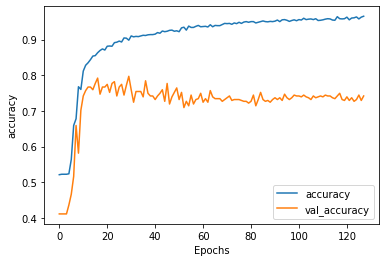

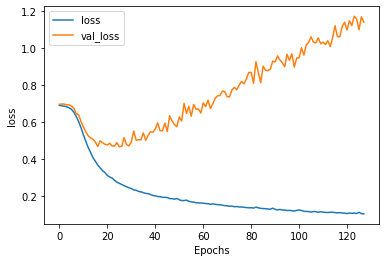

In [56]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [58]:
for_visualization(model, reverse_word_index, vocab_size)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>